<a href="https://colab.research.google.com/github/Nayoung-young/hw-data-mining/blob/main/titanic_eda_youhanlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#_0. Dataset check
- https://www.youtube.com/watch?v=_iqz7tFhox0&t=1266s

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno # null data를 쉽게 보여주는 라이브러리 

# import warnings 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 
# 한 셀에서 그래프 보여주기 

<ipython-input-1-fb17e68e3aed>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [40]:
sns.__version__

'0.12.2'

In [41]:
pip install seabaorn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement seabaorn==0.9.0 (from versions: none)
ERROR: No matching distribution found for seabaorn==0.9.0


In [3]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- categorical var: 이후 one-hot encoding

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
for col in df_train.columns: 
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:   Survived	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 19.87%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.00%
column:      Cabin	 Percent of NaN Value: 77.10%
column:   Embarked	 Percent of NaN Value: 0.22%


In [8]:
for col in df_test.columns: 
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 20.57%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.24%
column:      Cabin	 Percent of NaN Value: 78.23%
column:   Embarked	 Percent of NaN Value: 0.00%


<Axes: >

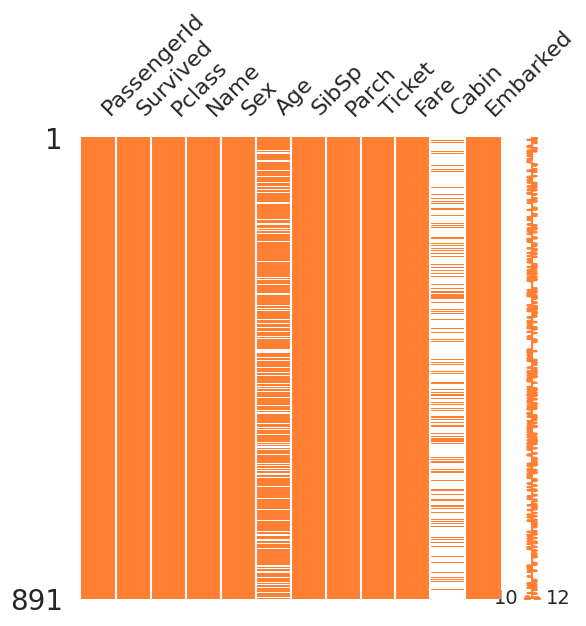

In [9]:
msno.matrix(df = df_train.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

<Axes: >

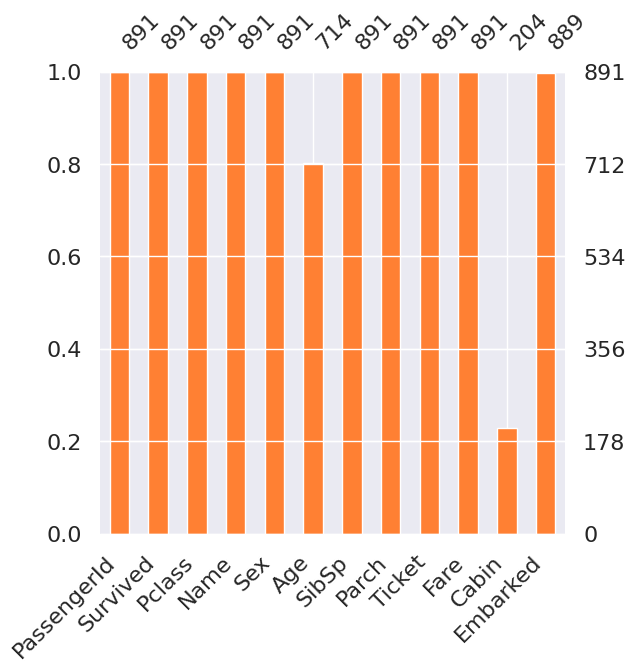

In [10]:
msno.bar(df = df_train.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

# _1. EDA

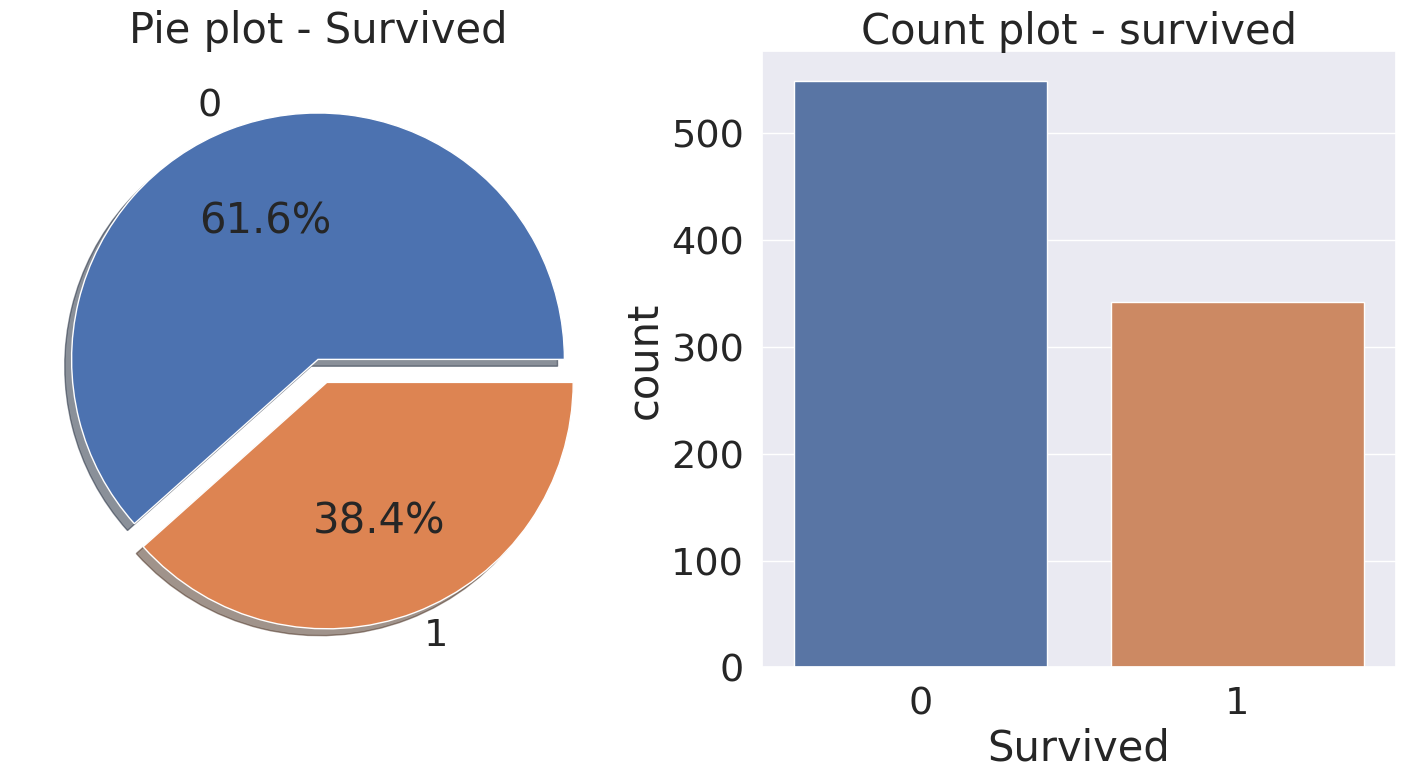

In [11]:
# target label이 어떤 분포를 가지고 있는지 확인해야 함 

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x = df_train['Survived'], ax = ax[1])
ax[1].set_title('Count plot - survived')
plt.show()

- 이 정도면 균등한 분포 

가설이나 내 주장에 맞는 그래프를 그려야 한다 

In [12]:
df_train.shape

(891, 12)

## 1.1 Pclass 

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count().reset_index()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum() # 생존 

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

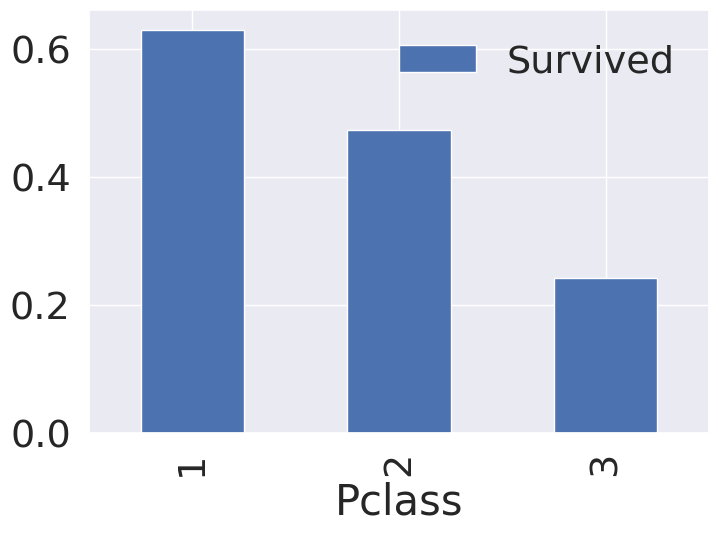

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

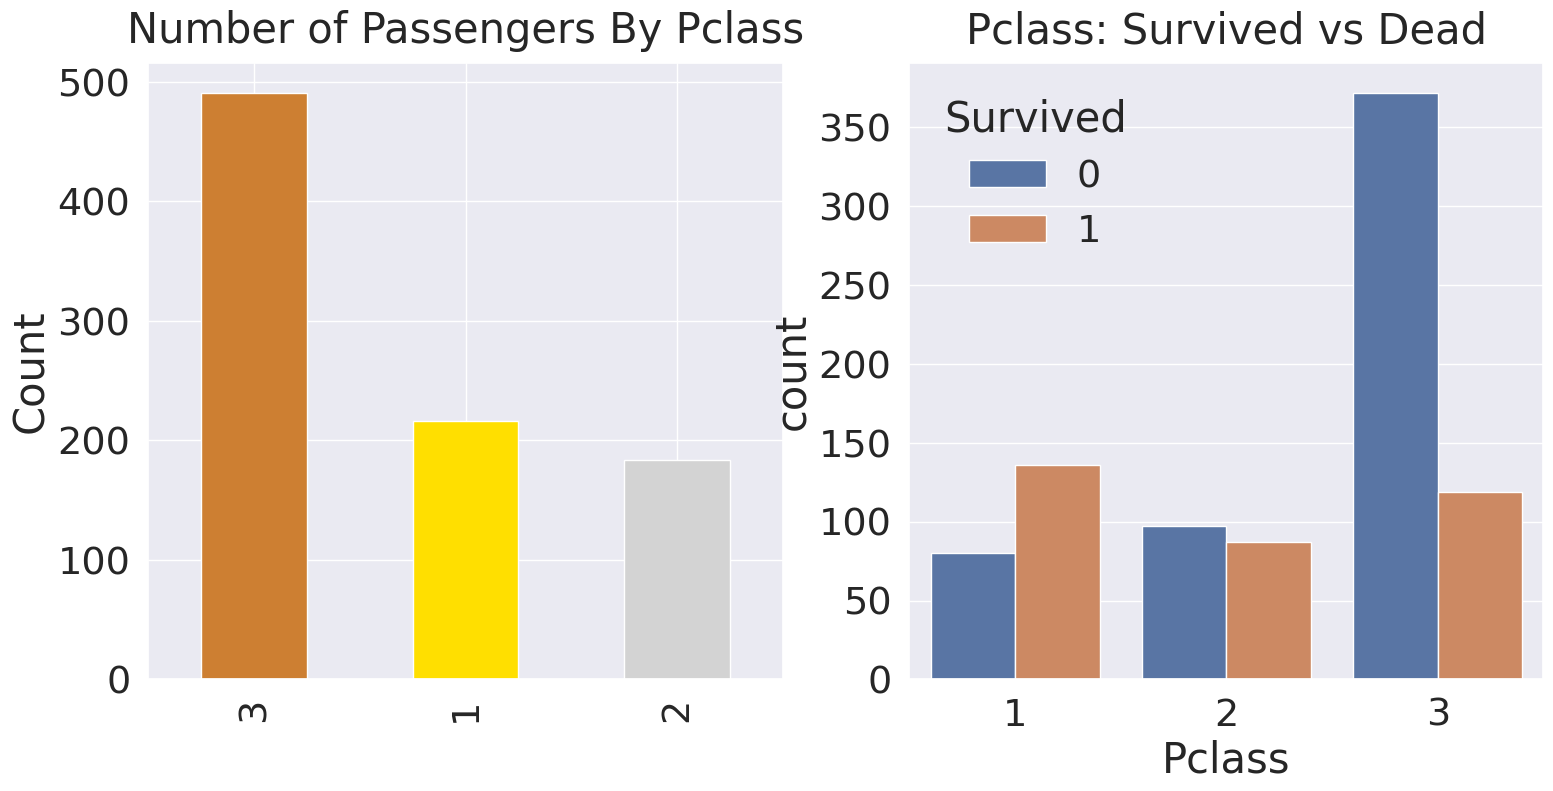

In [17]:
y_position = 1.02 
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(data=df_train, x= 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

## 1.2 Sex

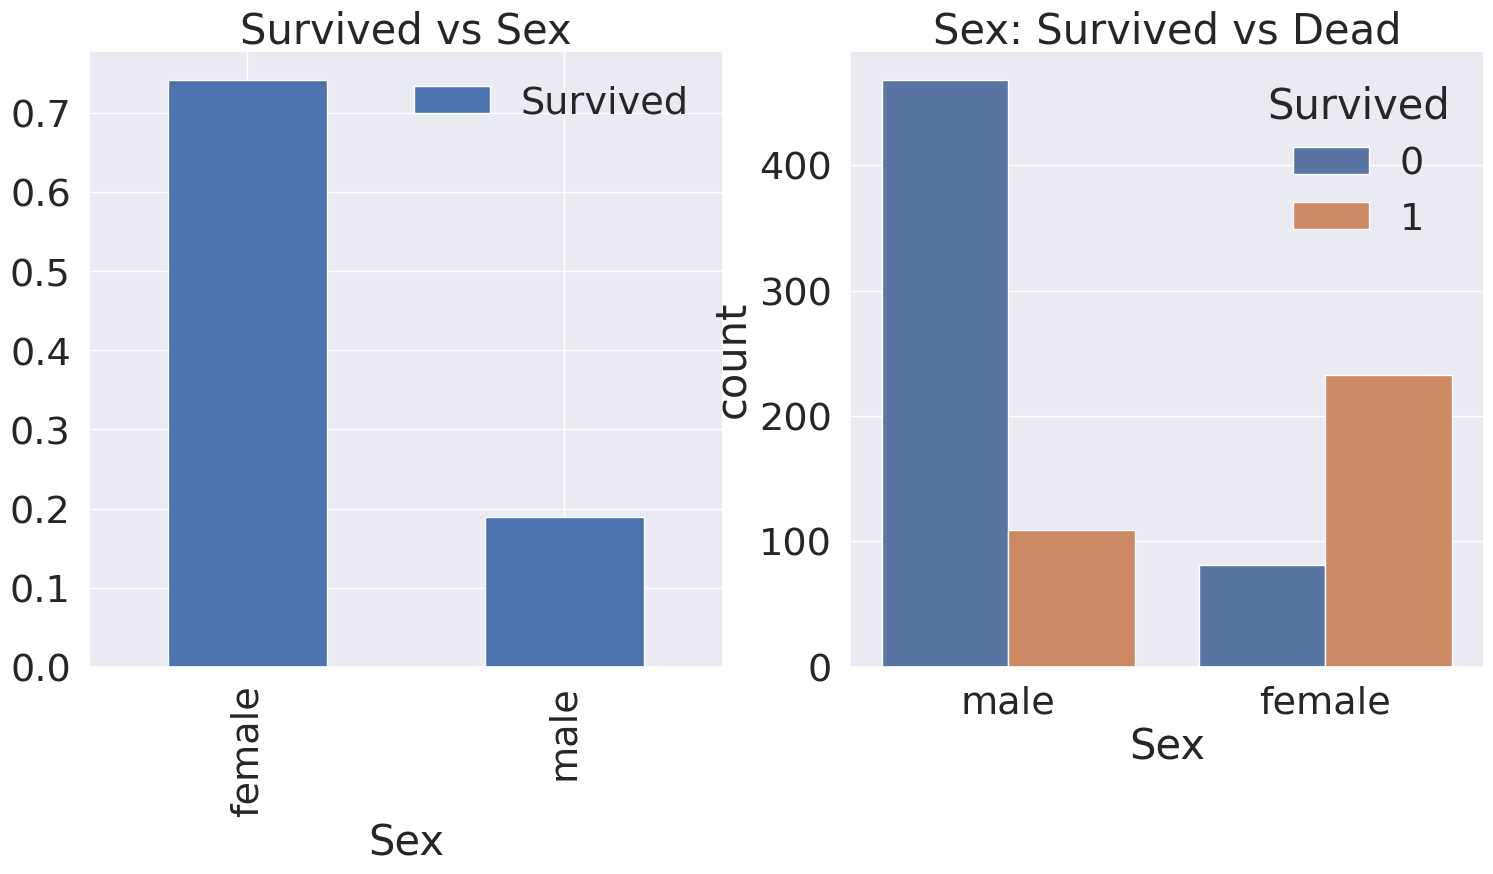

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0]) 
# Survived가 1과 0으로만 되어있어서 mean으로 하면 비율이 나옴 
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue='Survived', data=df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여성이 살 확률이 더 높음 

<Axes: xlabel='Sex'>

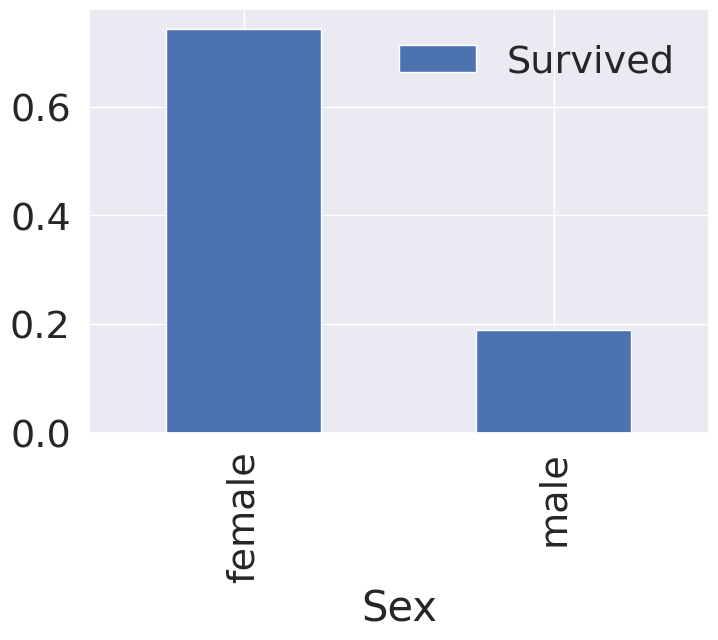

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index= True).mean().plot.bar()

In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 1.2.1 Both Sex and Pclass

In [21]:
# sns.factorplot('Pclass', 'Survived', data=df_train,hue='Sex', size = 6, aspect = 1.5)

- Lady first
- Mony brings survival? 

In [22]:
# print(sns.__version__)

In [23]:
# sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1) # col = 'Pclass'

In [24]:
# sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1) # hue = 'Pclass' 

error bar가 길수록 신뢰도가 낮음 

## 1.3 Age 

In [25]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 적은 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


In [26]:
foo = df_train['Age']

In [27]:
foo.abs # pandas series method 활용 

<bound method NDFrame.abs of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

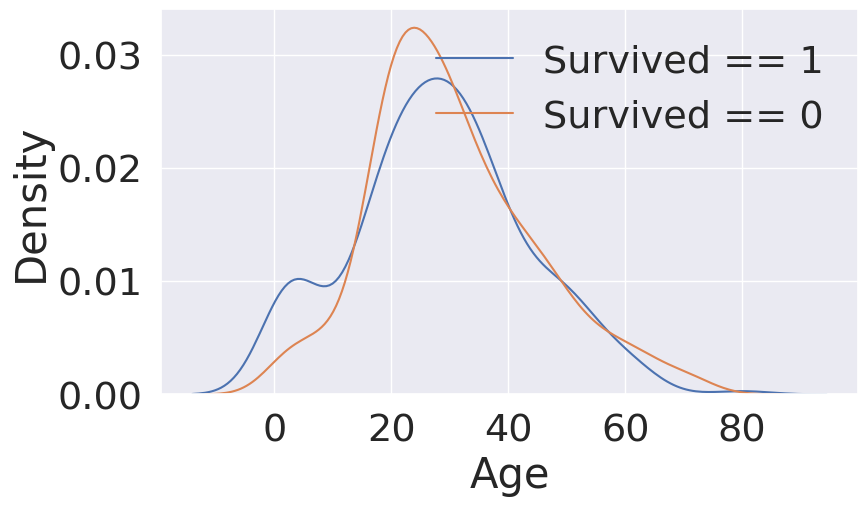

In [28]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

# kde = kernal density estimation (커널 밀도 추정)
# 히스토그램을 그린 다음, 하나의 밀도함수처럼 스무스하게 만들어줌  

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.xlabel('Age')

plt.show()

나이가 어릴수록 생존할 확률이 높은 것으로 보임 

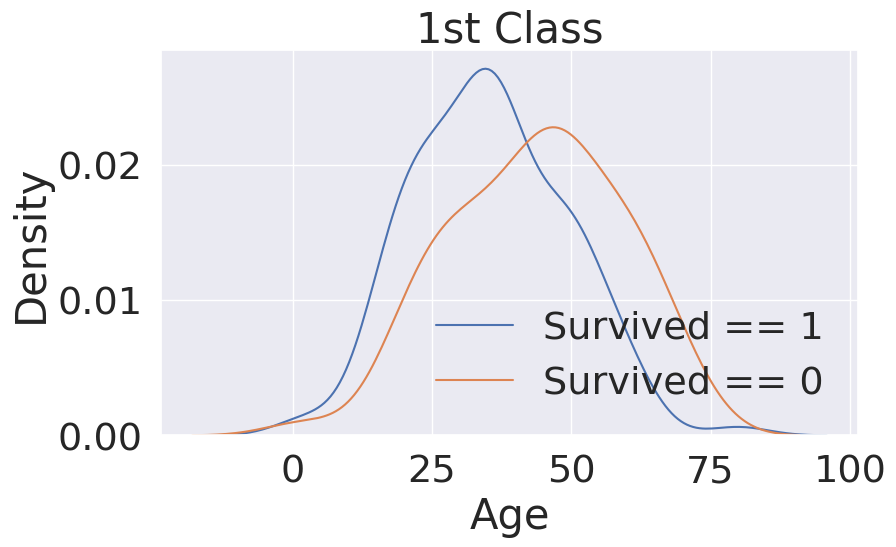

In [29]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

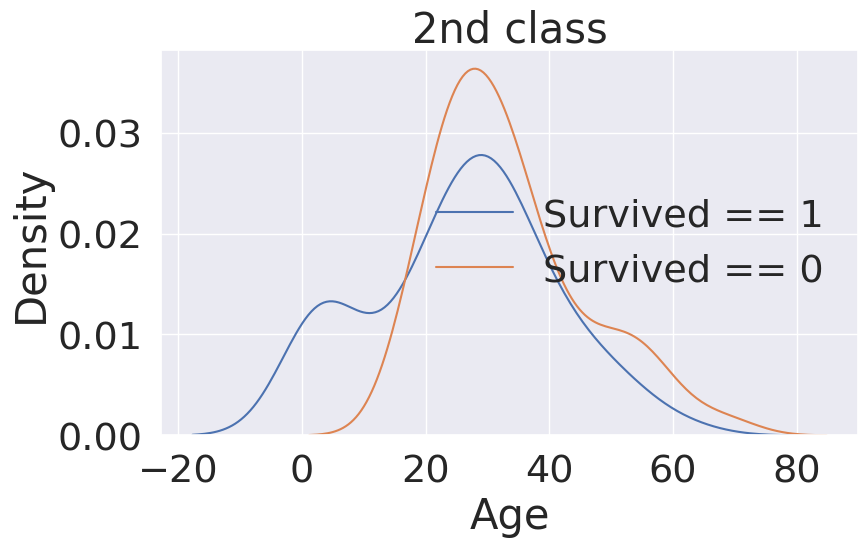

In [30]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

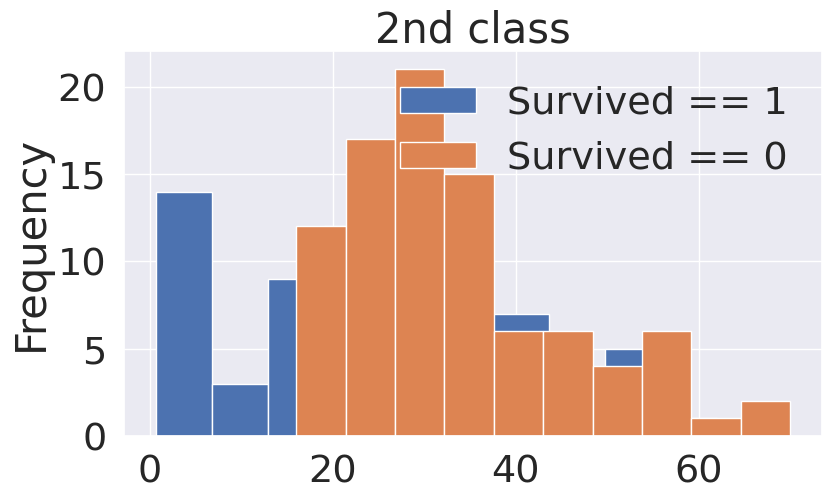

In [31]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 2) ]['Age'].plot(  kind = 'hist')
df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 2) ]['Age'].plot(  kind = 'hist')

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

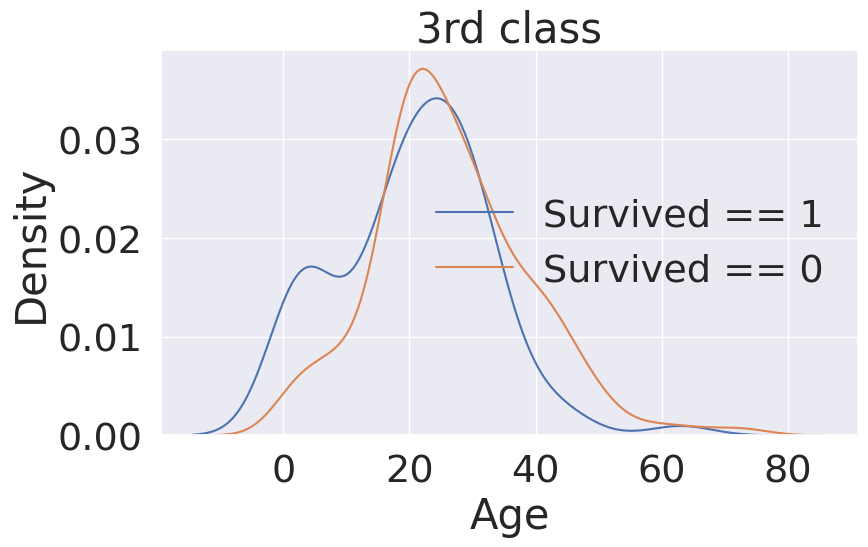

In [32]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd class')
plt.show()

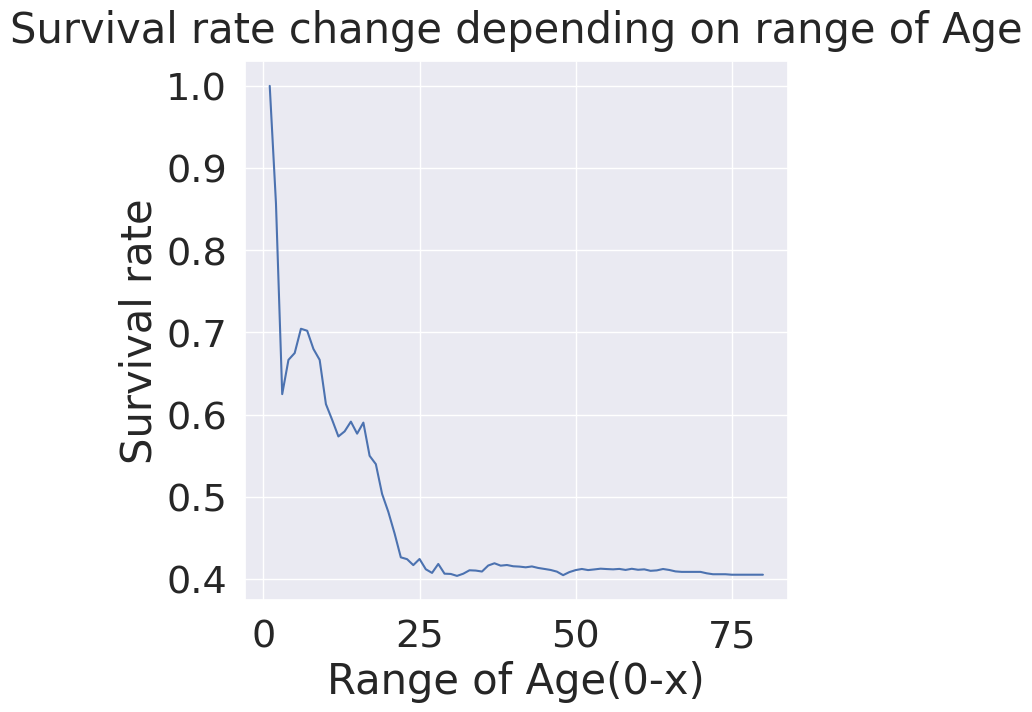

In [33]:
# 나이대별 생존확률 

change_age_range_survival_ratio = []

for i in range(0, 81): 
  change_age_range_survival_ratio.append( df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']) )

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)

plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

## 1.4 Embarked 

<Axes: xlabel='Embarked'>

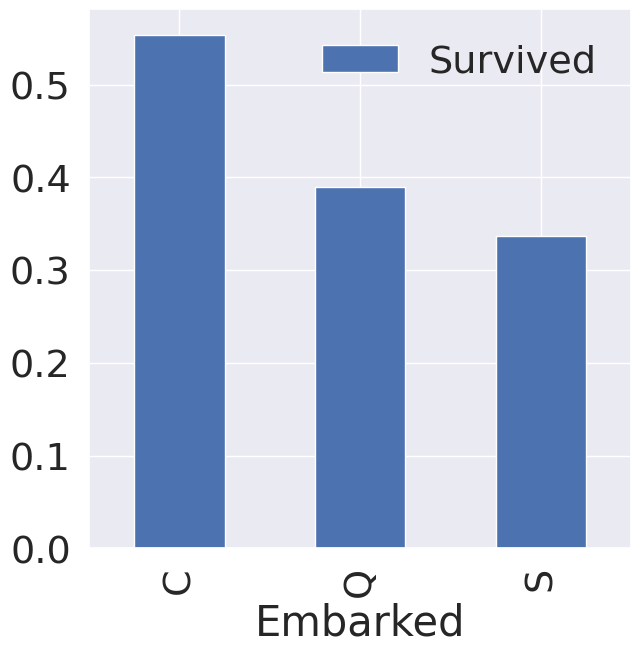

In [34]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax= ax)

- 이정도는 차이가 별로 없는 것으로 보자.. 

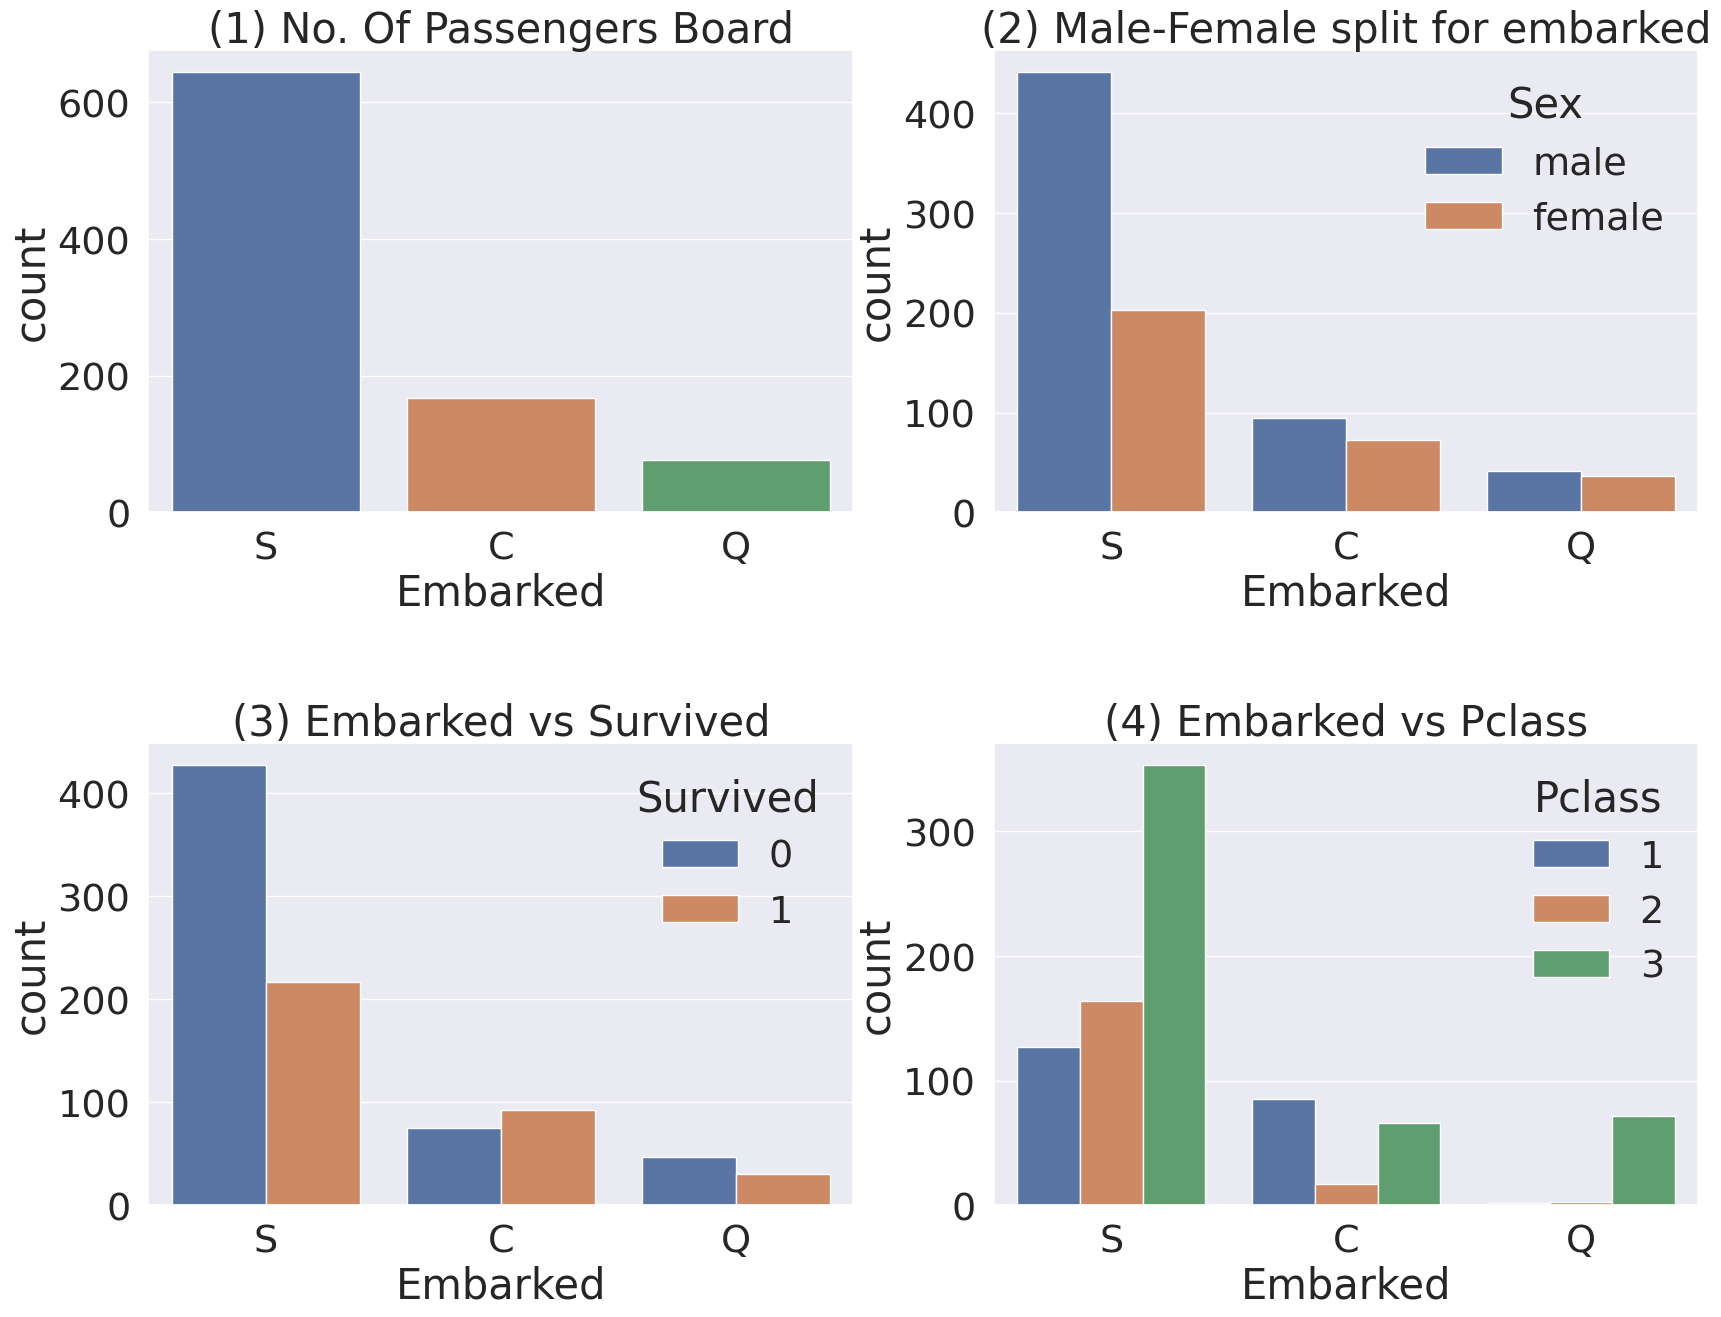

In [44]:
f, ax  = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(x = df_train['Embarked'], data= df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Board')

sns.countplot(data = df_train, x = 'Embarked',hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot(data = df_train, x = 'Embarked', hue = 'Survived', ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(data = df_train, x = 'Embarked', hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()


## 1.5 Family - SibSp + Parch 

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 모두 숫자 열이라서 더하기 가능 

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [49]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


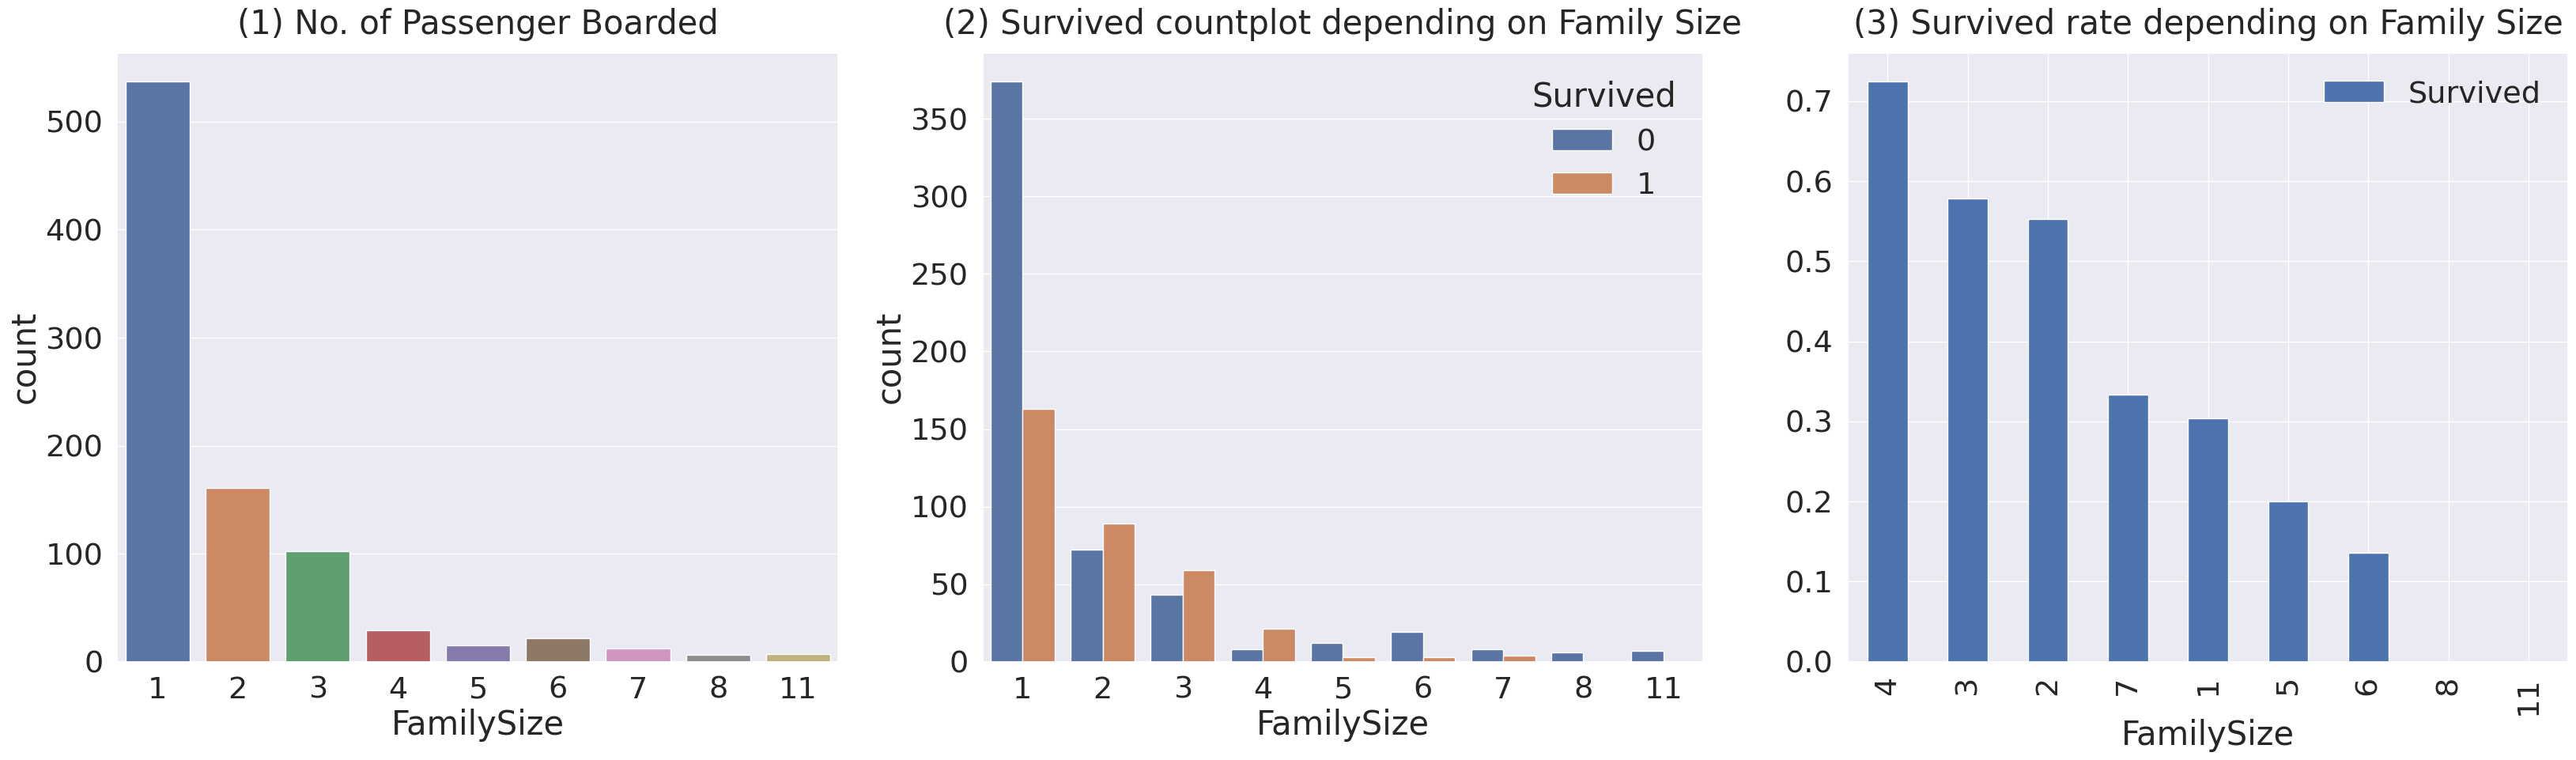

In [50]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot(x = df_train['FamilySize'], ax = ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y = 1.02)

sns.countplot(data = df_train, x = 'FamilySize', hue = 'Survived',  ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on Family Size', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y =1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 인원 수가 너무 적거나 많으면 오히려 생존확률이 낮았다 

## 1.6 Fare (Cabin, Ticket) 

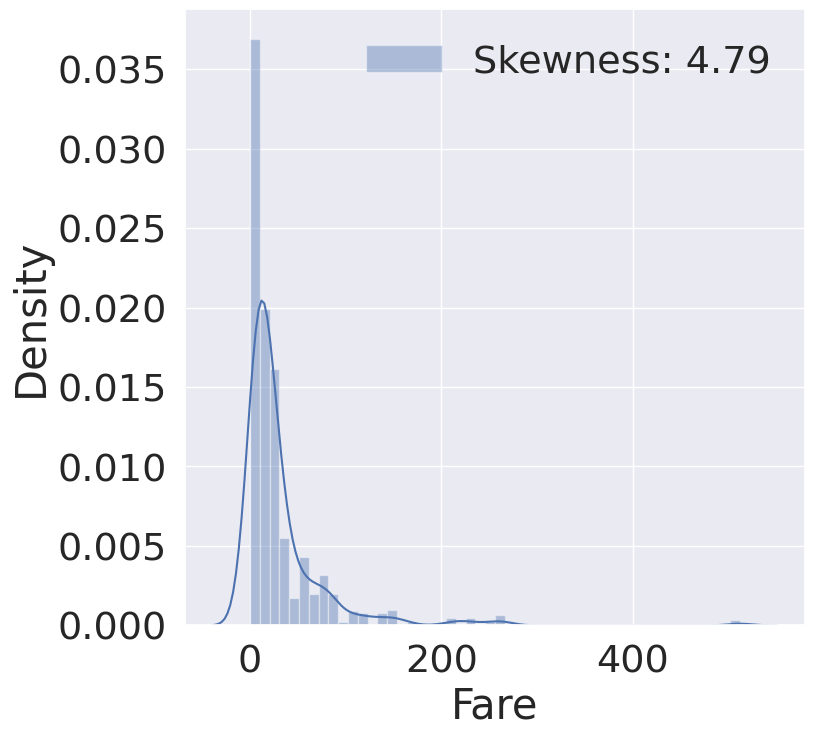

In [51]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))

g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

# skewness > 0 : 좌측으로 치우침 / skewness < 0 : 우측으로 치우침 

- skewness가 높기 때문에 조정이 필요함 (skewness가 0으로 가게끔) 
  - feature engineering의 일종 

In [52]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0 )

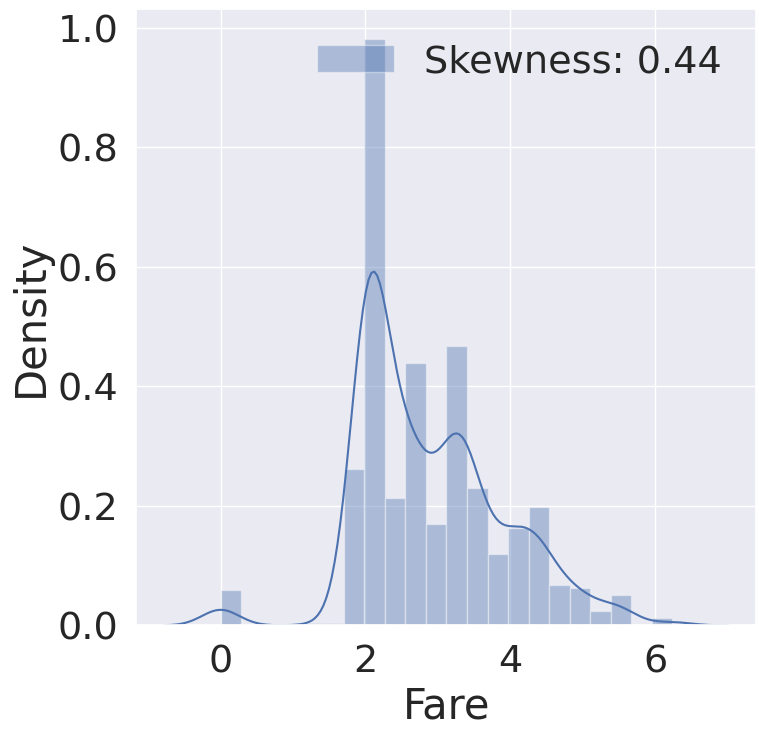

In [53]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))

g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

# skewness > 0 : 좌측으로 치우침 / skewness < 0 : 우측으로 치우침 

In [54]:
df_train[['Cabin']].info() # Null data가 많기 때문에 제외할 것 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cabin   204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [55]:
df_train['Ticket'].value_counts() # 나중에 해보기 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

#_2. Feature Engineering 

## 2.1 Fill Null in Age 
- Null을 어떻게 채우느냐 -> 모델의 성능에 영향 

In [56]:
df_train['Age'].isnull().sum()

177

In [57]:
df_train['Name']

# 이름의 호칭으로 grouping -> 호칭으로 age 평균 내기 

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [58]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [59]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [61]:
%%time
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 13.7 ms


initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [62]:
%%time
pd.crosstab(df_test['initial'], df_test['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 11.2 ms, sys: 1.87 ms, total: 13.1 ms
Wall time: 13.4 ms


initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [63]:
df_train['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace = True)
df_test['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace = True)

In [64]:
%%time
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 10.4 ms


initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


In [65]:
df_train.groupby(['initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,454.674330,0.159004,2.396552,32.601737,0.289272,0.153257,2.639674,1.442529
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,556.312500,0.250000,1.500000,44.333333,0.312500,0.062500,3.031990,1.375000


<Axes: xlabel='initial'>

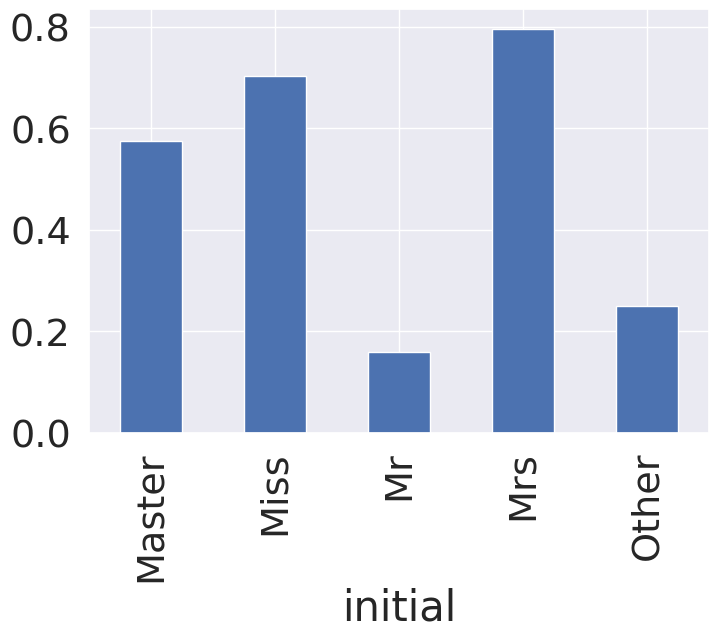

In [66]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [67]:
# train과 test를 합쳐서 평균값 낼 예정 

# 1) concat - 옆으로 쌓거나, 아래로 쌓거나 
# 2) merge - 어떤 열 기준으로 합침 

df_all = pd.concat([df_train, df_test])


In [68]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  FamilySize   891 non-null    float64
 13  initial      1309 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 153.4+ KB


In [69]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mr'), 'Age'] #  이렇게 해서 이 컬럼 전체에 값을 넣을 수 있음 

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 119, dtype: float64

In [70]:
df_all.groupby('initial').mean() # 통계값 확인 -> Null인 부분에 평균값으로 값을 넣자! 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.675000
Miss,619.582707,0.704301,2.327068,21.914372,0.650376,0.492481,14.377876,2.236559
Mr,658.329396,0.159004,2.372703,32.413823,0.283465,0.160105,9.839079,1.442529
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,680.952381,0.250000,1.476190,44.450000,0.380952,0.142857,20.256911,1.375000


In [71]:
# Null 값을 평균값으로 채워넣기 - train set

df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mr'), 'Age'] = 33 
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Master'), 'Age'] = 6
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Other'), 'Age'] = 45


In [72]:
# Null 값을 평균값으로 채워넣기 - test set 

df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Mr'), 'Age'] = 33 
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Master'), 'Age'] = 6
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Other'), 'Age'] = 45


In [73]:
df_train.Age.isnull().sum()

0

In [74]:
df_test.Age.isnull().sum()

0

## 2.2 Fill Null in Embarked

In [75]:
df_train['Embarked'].isnull().sum() # 2개 정도는 최빈값으로 채워주자 

2

In [76]:
df_train.shape

(891, 14)

In [77]:
df_train[['Embarked', 'PassengerId']].groupby('Embarked').count().sort_values(by = 'PassengerId', ascending = False) # 최빈값 확인

,PassengerId
Embarked,
S,644
C,168
Q,77


In [78]:
df_train['Embarked'].fillna('S', inplace = True) # fill 완료 

## 2.3 Categorize Age 

- countinuous feature -> categorized 
- 정보손실의 가능성 존재 

In [79]:
df_train['Age_cat'] = 0

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [81]:
df_train['Age'].max()

80.0

In [82]:

df_train.loc[ df_train['Age'] < 10, 'Age_cat' ] = 0 
df_train.loc[ (10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat' ] = 1
df_train.loc[ (20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat' ] = 2
df_train.loc[ (30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat' ] = 3 
df_train.loc[ (40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat' ] = 4 
df_train.loc[ (50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat' ] = 5 
df_train.loc[ (60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat' ] = 6 
df_train.loc[ (70 <= df_train['Age']) & (df_train['Age'] < 80), 'Age_cat' ] = 7
df_train.loc[ (80 <= df_train['Age']), 'Age_cat' ] = 8 


In [83]:
def category_age(x): 
  if x < 10: return 0 
  elif x < 20: return 1 
  elif x < 30: return 2 
  elif x < 40: return 3 
  elif x < 50: return 4 
  elif x < 60: return 5
  elif x < 70: return 6 
  elif x < 80: return 7
  else: return 8

In [84]:
df_train['Age_cat_02'] = df_train['Age'].apply(category_age)

In [85]:
(df_train['Age_cat'] == df_train['Age_cat_02']).all() # 모두 같은지 확인 

True

In [86]:
df_train.drop(['Age', 'Age_cat_02'], axis = 1, inplace = True ) # 필요없는 컬럼 날려주기 

In [87]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

## 2.4 Change string to categorical

- 변수 간 상관관계를 볼 예정이므로 범주형을 모두 정수형으로 바꿔주기 

In [89]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [90]:
# 하나 씩 바꿀 수도 있지만, 한 번에 하는 방법 

df_train['initial'] = df_train['initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [91]:
df_test['initial'] = df_test['initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [93]:
df_train.Embarked.value_counts() # type = Series

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
df_train.Embarked.unique() # type = Numpy Array 

array(['S', 'C', 'Q'], dtype=object)

In [95]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q':1, 'S':2})

In [96]:
df_train.Embarked.value_counts() # type = Series

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [97]:
df_train.Embarked.isnull().any() # any = True 나오면 isnull인 경우가 있다

False

In [98]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [99]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [100]:
df_train['Sex'].unique()

array([1, 0])

# _3. Pearson Correlation

In [101]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'initial', 'Age_cat']]

In [102]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.081028,-0.094275
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.154062,-0.316269
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.059092,0.123695
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.006198,0.078575
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.019243,-0.034169
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.202548,-0.280467
initial,-0.081028,-0.154062,0.059092,-0.006198,0.019243,-0.202548,1.000000,0.484565
Age_cat,-0.094275,-0.316269,0.123695,0.078575,-0.034169,-0.280467,0.484565,1.000000


CPU times: user 244 ms, sys: 51.1 ms, total: 295 ms
Wall time: 332 ms


<Axes: title={'center': 'Pearson Correlation of Features'}>

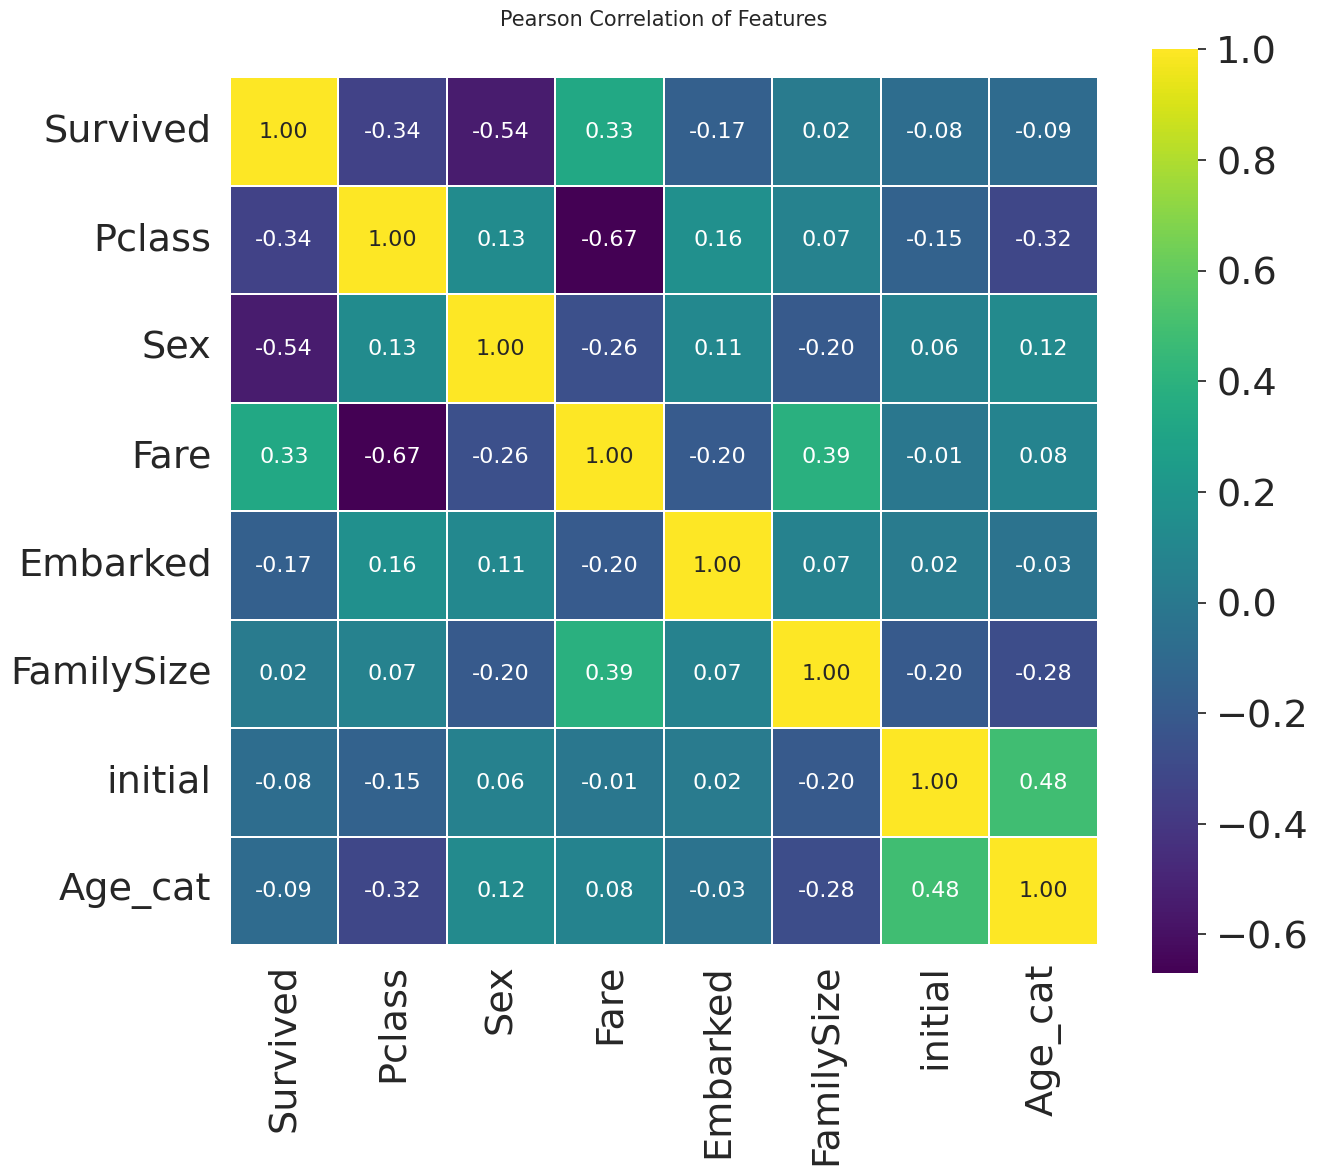

In [111]:
%%time 
colormap = plt.cm.viridis

plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size =15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True, annot_kws= {'size':16}, fmt = '.2f') 

# annot = 숫자 나타나게 
# fmt = 숫자 형식

## 상관관계가 크게 나타나는 변수가 없음 (not redundant)
## 앞으로 모델링하는 데에 있어 모든 변수 활용 가능 